# Webscrapping using BeautifulSoup

This project is aimed to obtain some specifics information from dataset that was collected by web scrapping method. Those datasets came from mifx.com which is a web that provide some financial information and imdb.com which is a movies web based. From mifx.com, it is scrapped to obtain the currency values within 5 latest days. While from imdb.com, it is scrapped to obtain the top 50 by popularities that was released on 2019. Down below will be explained in detail for the insights of each datasets. those datasets analysis will be run in Flask framework to create a light web application  



In [1]:
import requests
import numpy as np
from bs4 import BeautifulSoup 
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import dateparser


url_get = requests.get('https://news.mifx.com/kurs-valuta-asing.php?kurs=JPY')

In [2]:
imdb_get = requests.get('https://www.imdb.com/search/title/?release_date=2019-01-01,2019-12-31')

To visualize what exactly you get from the `request.get`, we can use .content so we can see what we exactly get, in here we slice it so it won't make our screen full of the html we get from the page.

In [3]:
url_get.content[1:777]

b'!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\n<html xmlns="http://www.w3.org/1999/xhtml">\n<head>\n<meta http-equiv="Content-Language" content="en,in" />\n<link rel="alternate" href="https://news.mifx.com/kurs-valuta-asing.php" hreflang="en-ID" />\n<base href="https://news.mifx.com/" target="_self" />\n<title>Kurs Dollar | USD | Nilai Tukar Dollar Hari Ini</title>\n<meta property="og:title" content="Kurs Dollar | USD | Nilai Tukar Dollar Hari Ini" />\n<meta name="description" content="Nilai tukar rupiah terhadap dollar hari ini berdasarkan kurs tengah Bank Indonesia. " />\n<meta property="og:description" content="Nilai tukar rupiah terhadap dollar hari ini berdasarkan kurs tengah Bank Indonesia. " />'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. But you’ll only ever have to deal with about four kinds of objects: `Tag`, `NavigableString`, `BeautifulSoup`, and `Comment`. But at this module we will only use `BeautifulSoup`.

In [4]:
soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


In [5]:
imdb = BeautifulSoup(imdb_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


Let's see how our beautifulsoup looks like. As we can see, the content is the same with our `get_url` object but it's tidier. Also beautifulsoup give us method to make it even more prettier, for tidyness purpose we slice to only see first 1045 character. 

In [6]:
print(soup.prettify()[:1045])

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html xmlns="http://www.w3.org/1999/xhtml">
 <head>
  <meta content="en,in" http-equiv="Content-Language"/>
  <link href="https://news.mifx.com/kurs-valuta-asing.php" hreflang="en-ID" rel="alternate"/>
  <base href="https://news.mifx.com/" target="_self"/>
  <title>
   Kurs Dollar | USD | Nilai Tukar Dollar Hari Ini
  </title>
  <meta content="Kurs Dollar | USD | Nilai Tukar Dollar Hari Ini" property="og:title"/>
  <meta content="Nilai tukar rupiah terhadap dollar hari ini berdasarkan kurs tengah Bank Indonesia. " name="description"/>
  <meta content="Nilai tukar rupiah terhadap dollar hari ini berdasarkan kurs tengah Bank Indonesia. " property="og:description"/>
  <meta content="Broker Terbaik, Trading Forex, Trading Teregulasi, Trading Online, Monex, mifx," name="keywords"/>
  <meta content="favicon.jpg?v=1570462055" property="og:image"/>
  <meta content="Ultimaen

In [7]:
print(imdb.prettify()[:1045])

<!DOCTYPE html>
<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="app-id=342792525, app-argument=imdb:///?src=mdot" name="apple-itunes-app"/>
  <script type="text/javascript">
   var IMDbTimer={starttime: new Date().getTime(),pt:'java'};
  </script>
  <script>
   if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
  </script>
  <script>
   (function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);
  </script>
  <title>
   Released between 2019-01-01 and 2019-12-31
(Sorted by Popularity Ascending) - IMDb
  </title>
  <script>
   (function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);
  </script>
  <script>
   if (typeof uet == 'function') {
      uet("be", "LoadTitle", {wb: 1});
    }
  </script>
  <script>
   if (typeof uex == 'functi

# MIFX Analysis

We would like to find the right key in mifx.com datasets, by choosing the 'table' key in HTML of mifx.com, then putting the class based on the information on it, so we can get the table part in HTML language

In [8]:
table = soup.find('table', attrs={'class':'centerText newsTable2'})
print(table.prettify()[1:500])

table cellpadding="10" cellspacing="0" class="centerText newsTable2" width="100%">
 <tr class="colorWhite fontsize14 firstRow">
  <td>
   TANGGAL
  </td>
  <td>
   ASK
  </td>
  <td>
   BID
  </td>
 </tr>
 <tr class="verySoftGreyBg">
  <td>
   07 Agustus 2020
  </td>
  <td>
   139,42
  </td>
  <td>
   138,02
  </td>
 </tr>
 <tr>
  <td>
   06 Agustus 2020
  </td>
  <td>
   138,88
  </td>
  <td>
   137,48
  </td>
 </tr>
 <tr class="verySoftGreyBg">
  <td>
   05 Agustus 2020
  </td>
  <td>
   139,


Next we want to specify each rows from the table, the key that is used is 'tr', so that we obtain 6 rows (include header consider as a row) 

In [9]:
tr = table.find_all('tr')
len(tr)

6

Do the scrapping process here using loop to scrap the column information in each rows. the key for column information was stored in 'tr' key. the result of this loop will be stored in array in order to make a dataframe

In [10]:
temp = [] #initiating a tuple

for i in range(1, len(tr)):
    row = table.find_all('tr')[i]
    
    #get date
    tanggal = row.find_all('td')[0].text
    tanggal = tanggal.strip() #for removing the excess whitespace
    
    #get sold price
    sold = row.find_all('td')[1].text
    sold = sold.strip() #for removing the excess whitespace
    
    #get buy price
    buy = row.find_all('td')[2].text
    buy = buy.strip() #for removing the excess whitespace
    
    temp.append((tanggal,sold,buy)) 
    
temp

[('07\xa0Agustus\xa02020', '139,42', '138,02'),
 ('06\xa0Agustus\xa02020', '138,88', '137,48'),
 ('05\xa0Agustus\xa02020', '139,23', '137,84'),
 ('04\xa0Agustus\xa02020', '139,19', '137,79'),
 ('03\xa0Agustus\xa02020', '139,72', '138,32')]

Put the array into dataframe

In [11]:
df = pd.DataFrame(temp, columns = ('tanggal','sold','buy'))
df

,tanggal,sold,buy
0,07 Agustus 2020,"139,42","138,02"
1,06 Agustus 2020,"138,88","137,48"
2,05 Agustus 2020,"139,23","137,84"
3,04 Agustus 2020,"139,19","137,79"
4,03 Agustus 2020,"139,72","138,32"


In [12]:
dfcopy = df.copy()
dfcopy.tanggal = dfcopy.tanggal.apply(dateparser.parse)
dfcopy = dfcopy.rename(columns={'tanggal':'date'})

In [13]:
df1 = pd.concat([df,dfcopy.date],axis=1).sort_values('date')

Do the data cleaning here, first change the data type of some columns correctly. Down below, change some numeric values in float data type

In [14]:
df1.sold = df.sold.apply(lambda x : x.replace(',','.')).astype('float64')
df1.buy = df.buy.apply(lambda x : x.replace(',','.')).astype('float64')

In [15]:
df1.dtypes

tanggal            object
sold              float64
buy               float64
date       datetime64[ns]
dtype: object

This is a simple plot to visualize the trend of the sold price of YEN, means that if we want to buy 1 YEN, has a value in rupiahs that was represented by sold price in Rupiahs versus time in 5 latest weekdays

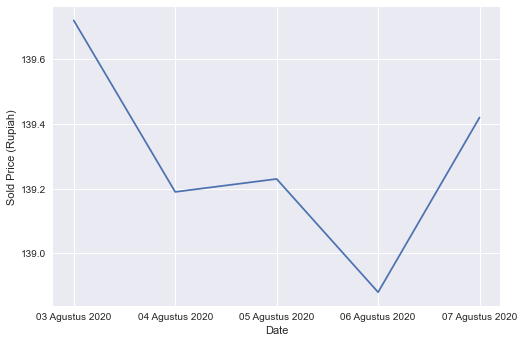

In [16]:
X=df1.tanggal
Y=df1.sold
plt.xticks(rotation=0)
plt.ylabel('Sold Price (Rupiah)')
plt.xlabel('Date')
plt.plot(X,Y)

Quick Analysis and conclusion first week of August 2020:
1. We can conclude that there was some declining sold price on YEN in the first week of August, means that rupiah values getting increase relatives to YEN japan. it can be affected by the performance of economic activity in Indonesia domestically usually increase because of the indonesia independence moment. It is recommended to local investors to buy YEN because the value is low in the first week of August and make some transaction in YEN
2. In other hand, in the end of the first week there was inclining level of YEN values relatives to rupiah with values of approximately 0.4 points and most likely will increase in the later week. It is recommended for investors to prepare sell their YEN

# IMDB ANALYSIS

We would like to find the right key in imdb.com datasets, by choosing the 'table' key in HTML of imdb.com, then putting the class based on the information on it, so we can get the table part in HTML language

In [17]:
imdbtable = imdb.find('div', attrs={'class':'lister-list'})
len(imdbtable)

101

Then find the list of the movies in HTML page, the key that we use is 'div' in 'lister-item-content' class, we will get the top 50 movies information

In [18]:
spec = imdbtable.find_all('div', attrs={'class':'lister-item-content'})
len(spec)

50

Do the scrapping process here using loop to scrap the information in each rows. the key for column information was stored in special key for every piece of information. the result of this loop will be stored in array in order to make a dataframe, we can refer carefully which key that contain particular information down below

In [19]:
predf = [] #initiating a tuple to get title , imdb rating , metascore, votes, duration, certification and genres

for i in range(0, len(spec)):
        row = imdbtable.find_all('div', attrs={'class':'lister-item-content'})[i]

        #get title
        title = row.find('h3', attrs={'class':'lister-item-header'}).find('a').text
        title = title.strip() #for removing the excess whitespace

        #get rating
        rating = row.find('div', attrs={'class':'inline-block ratings-imdb-rating'}).text
        rating = rating.strip() #for removing the excess whitespace
        
        #get vote
        vote = row.find('span', attrs={'name':'nv'}).text
        vote = vote.strip() #for removing the excess whitespace

        try :
            #get metascore
            metascore = row.find('span', attrs={'class':'metascore favorable'}).text
            metascore = metascore.strip() #for removing the excess whitespace
        except:
            metascore = np.nan
        
        try :
            #get duration
            dur = row.find('span', attrs={'class':'runtime'}).text
            dur = dur.strip() #for removing the excess whitespace
        except:
            dur = np.nan
            
        try :
            #get certification
            certification = row.find('span', attrs={'class':'certificate'}).text
            certification = certification.strip() #for removing the excess whitespace
        except:
            certification = np.nan

        try :
            #get certification
            genre = row.find('span', attrs={'class':'genre'}).text
            genre = genre.strip() #for removing the excess whitespace
        except:
            genre = np.nan
    
        predf.append((title,rating,metascore,vote,dur,certification,genre))

predf

[('The Umbrella Academy',
  '8.0',
  nan,
  '113,509',
  '60 min',
  nan,
  'Action, Adventure, Comedy'),
 ('The Boys', '8.7', nan, '157,219', '60 min', nan, 'Action, Comedy, Crime'),
 ('Knives Out',
  '7.9',
  '82',
  '361,331',
  '130 min',
  '17+',
  'Comedy, Crime, Drama'),
 ('Watchmen', '8.1', nan, '74,687', '60 min', nan, 'Action, Drama, Mystery'),
 ('Euphoria', '8.3', nan, '44,635', '55 min', nan, 'Drama'),
 ('In the Dark', '7.4', nan, '4,898', '42 min', nan, 'Comedy, Crime, Drama'),
 ('Doom Patrol',
  '8.0',
  nan,
  '28,528',
  '60 min',
  nan,
  'Action, Adventure, Comedy'),
 ('For All Mankind', '7.5', nan, '9,487', '60 min', nan, 'Drama, Sci-Fi'),
 ('The Mandalorian',
  '8.7',
  nan,
  '182,108',
  '40 min',
  nan,
  'Action, Adventure, Sci-Fi'),
 ('The Gentlemen',
  '7.9',
  nan,
  '170,599',
  '113 min',
  '17+',
  'Action, Comedy, Crime'),
 ('Hanna', '7.5', nan, '22,595', '60 min', nan, 'Action, Drama'),
 ('The Witcher',
  '8.2',
  nan,
  '264,277',
  '60 min',
  nan,
  '

Creating the dataframe from the array that already generated, we can use this dataframe for further analysis

In [20]:
movies = pd.DataFrame(predf, columns =('title','rating','metascore','vote','duration','certification','genre'))
movies.head()

,title,rating,metascore,vote,duration,certification,genre
0,The Umbrella Academy,8.0,NaN,"113,509",60 min,NaN,"Action, Adventure, Comedy"
1,The Boys,8.7,NaN,"157,219",60 min,NaN,"Action, Comedy, Crime"
2,Knives Out,7.9,82,"361,331",130 min,17+,"Comedy, Crime, Drama"
3,Watchmen,8.1,NaN,"74,687",60 min,NaN,"Action, Drama, Mystery"
4,Euphoria,8.3,NaN,"44,635",55 min,NaN,Drama


Begin the data wrangling, as a point of interest, we would like to get use aggregate function, to observe the data that was grouped by specific genres, as we know that each movies has a single tags on genres or more. We want to analyze based on single type of genres, so that we can conclude the spesific single tag of genres which is popular in 2019

In [21]:
movies.vote = movies.vote.apply(lambda x : x.replace(',','.')).astype('float64') #changing the datatype of vote become float

As well as those data below, we have to change the numeric data become float or integer data to ease us for analyzing the data

In [22]:
movies.rating = movies.rating.astype('float64')
movies.metascore = movies.metascore.astype('float64')

In [23]:
movies.dtypes

title             object
rating           float64
metascore        float64
vote             float64
duration          object
certification     object
genre             object
dtype: object

Those cell below is the syntax for obtaining the single tag of the genres then aggregate based on the single tag on average rating, so we can conclude the most popular tag in 2019

In [24]:
drama = pd.concat([movies,movies.genre.str.extract('.*(?P<Genres>Drama).*')],axis=1).groupby('Genres').agg({'rating':'mean','title':'count'}).reset_index()
action = pd.concat([movies,movies.genre.str.extract('.*(?P<Genres>Action).*')],axis=1).groupby('Genres').agg({'rating':'mean','title':'count'}).reset_index()
adventure = pd.concat([movies,movies.genre.str.extract('.*(?P<Genres>Adventure).*')],axis=1).groupby('Genres').agg({'rating':'mean','title':'count'}).reset_index()
comedy = pd.concat([movies,movies.genre.str.extract('.*(?P<Genres>Comedy).*')],axis=1).groupby('Genres').agg({'rating':'mean','title':'count'}).reset_index()
crime = pd.concat([movies,movies.genre.str.extract('.*(?P<Genres>Crime).*')],axis=1).groupby('Genres').agg({'rating':'mean','title':'count'}).reset_index()
mystery = pd.concat([movies,movies.genre.str.extract('.*(?P<Genres>Mystery).*')],axis=1).groupby('Genres').agg({'rating':'mean','title':'count'}).reset_index()
scifi = pd.concat([movies,movies.genre.str.extract('.*(?P<Genres>Sci-Fi).*')],axis=1).groupby('Genres').agg({'rating':'mean','title':'count'}).reset_index()
family = pd.concat([movies,movies.genre.str.extract('.*(?P<Genres>Family).*')],axis=1).groupby('Genres').agg({'rating':'mean','title':'count'}).reset_index()
thriller = pd.concat([movies,movies.genre.str.extract('.*(?P<Genres>Thriller).*')],axis=1).groupby('Genres').agg({'rating':'mean','title':'count'}).reset_index()
romance = pd.concat([movies,movies.genre.str.extract('.*(?P<Genres>Romance).*')],axis=1).groupby('Genres').agg({'rating':'mean','title':'count'}).reset_index()
biography = pd.concat([movies,movies.genre.str.extract('.*(?P<Genres>Biography).*')],axis=1).groupby('Genres').agg({'rating':'mean','title':'count'}).reset_index()
horror = pd.concat([movies,movies.genre.str.extract('.*(?P<Genres>Horror).*')],axis=1).groupby('Genres').agg({'rating':'mean','title':'count'}).reset_index()
war = pd.concat([movies,movies.genre.str.extract('.*(?P<Genres>War).*')],axis=1).groupby('Genres').agg({'rating':'mean','title':'count'}).reset_index()

su = pd.concat([drama,action,adventure,comedy,crime,mystery,scifi,family,thriller,romance,biography,horror,war]).reset_index().drop(columns='index')


In [25]:
summary = su.rename(columns={'title':'Count of Title','rating':'Average Rating'})

In [26]:
summary['Count of Title'] = summary['Count of Title'].astype('int64')

Those data are the top 5 genre tags that was popular with highest rating

In [27]:
sumsortrat = summary.sort_values('Average Rating',ascending=False)
sumsortrat.head()

,Genres,Average Rating,Count of Title
12,War,8.100000,2
8,Thriller,8.100000,5
7,Family,7.900000,1
4,Crime,7.810000,10
0,Drama,7.588571,35


<BarContainer object of 13 artists>

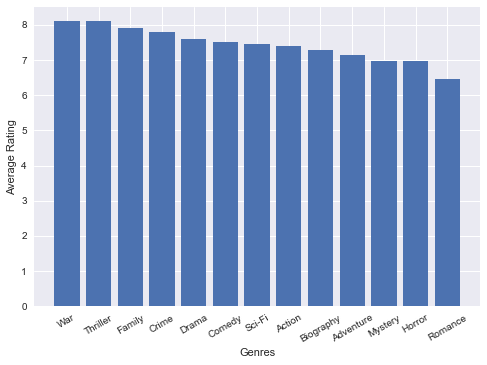

In [28]:
plt.xticks(rotation=30)
plt.ylabel('Average Rating')
plt.xlabel('Genres')
plt.bar(sumsortrat.Genres,sumsortrat['Average Rating'])

<BarContainer object of 13 artists>

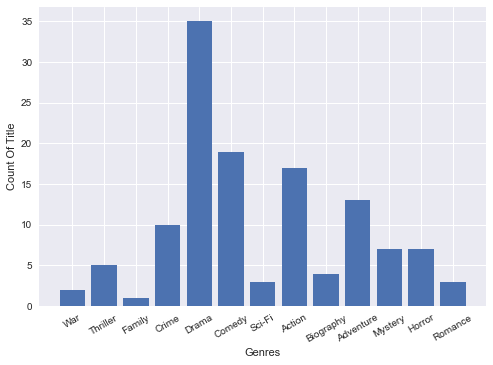

In [29]:
plt.xticks(rotation=30)
plt.ylabel('Count Of Title')
plt.xlabel('Genres')
plt.bar(sumsortrat.Genres,sumsortrat['Count of Title'])

Quick Analysis and Conclusion :
1. From the datasets we can conclude that the 50 most popular movies in 2019 has a average rating of 7, so if the movie is popular almost obvius that the viewer gives a good votes and response, thats a linear correlation between the popularity and rating
2. In point of view from Genres, from top 50 most popular movies, we have 13 single tags genres that represent the viewers preference.
3. Another point of interest is the top 3 genres by rating has a small number in quantities compare to the total drama movies in a year.
4. Drama movies seems to be popular with a chances to get a good rating as we can see from the top 5 genres. It is indicated that movie producers in the beginning year of 2019 were optimism to get high rating by putting some drama genre in their movie line, and most likely will be continue this trend in 2020
5. It is recommended for the movie producers to start innovate, create a movies with interesting plot and including War,Thriller,Family,Crime and Drama genres in their movies. By mix them in one movies will be interesting in 2020
6. One intermezzo points, romeo-jullete-ish love story isn't always popular with a good rating, they were beaten by some electrifying plot which is offered by war genres